In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random

labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
data_cluster = pd.read_csv('data_cluster.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",")
data_cluster.head()

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
1,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
2,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0.0,5.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
3,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
4,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0.0,6.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


## 30대 남자 Cluster 

In [2]:
cluster = data_cluster.loc[(data_cluster['GENDER_M'] == 1) & (data_cluster['CLNT_AGE'] == 30)]
cluster = cluster.drop(['GENDER_F','GENDER_M','CLNT_AGE'], axis=1)
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
cluster_drop.shape

(41865, 30)

In [3]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

#### Choosing the Number of Clusters : Elbow Method

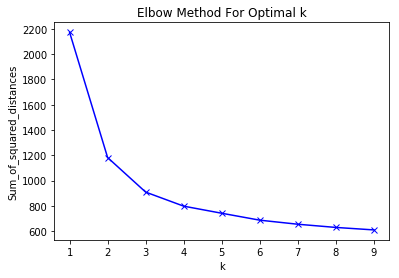

In [4]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)
    
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict = pd.DataFrame(km.predict(cluster_transformed)) # 학습된 모델이 맞춰 라벨 리턴
km_predict.columns = ['predict']

In [29]:
cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster.index

In [9]:
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed['predict'].value_counts()

0    2591
2     982
1     234
Name: predict, dtype: int64

In [10]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

<BarContainer object of 10 artists>

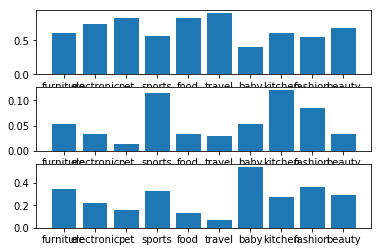

In [15]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()

# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

In [20]:
clutering = pd.concat([sum_of_sum,sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,3,labels
CLAC0_0,56.0,34.0,3.0,19.0,furniture
CLAC0_1,298.0,222.0,10.0,66.0,electronic
CLAC0_2,142.0,118.0,2.0,22.0,pet
CLAC0_3,3734.0,2095.0,430.0,1209.0,sports
CLAC0_4,321.0,268.0,11.0,42.0,food
CLAC0_5,167.0,150.0,5.0,12.0,travel
CLAC0_6,258.0,105.0,14.0,139.0,baby
CLAC0_7,208.0,126.0,25.0,57.0,kitchen
CLAC0_8,3578.0,1993.0,304.0,1281.0,fashion
CLAC0_9,3237.0,2199.0,107.0,931.0,beauty


<BarContainer object of 10 artists>

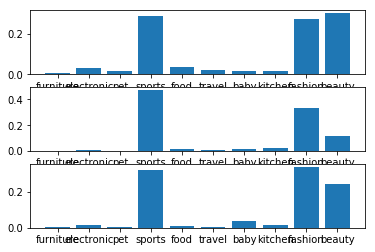

In [17]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [2]:
def clustering_index(k, new_data, data, transformed_data, category) :
    category_rate = np.empty([3,10])
    
    for i in range(k) :
        idx=np.where(cluster_transformed['predict']==i)
        clustering = data.loc[data.index[idx]]
        sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum().sum()
        category_rate[i] = (clustering[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum())/sum_of_sum
    
    diatance_from_centers = [0] * k
    for i in range(k) :
        diatance_from_centers[i] = np.sqrt(sum((km.cluster_centers_[i] - new_data)**2))

    result = [0] * k
    for i in range(k) :
        result[i] = category_rate[i][category]/diatance_from_centers[i]

    return sum(result)

In [19]:
random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
random_data = cluster_transformed.loc[random_idx, :"month_9"]

score = []
for i in range(10) :
    s = clustering_index(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
3,sports,141.41,1.0
8,fashion,139.14,4.0
9,beauty,127.88,0.0
4,food,12.23,0.0
1,electronic,11.60,2.0
6,baby,10.63,0.0
7,kitchen,7.76,0.0
5,travel,6.30,0.0
2,pet,5.51,0.0
0,furniture,2.21,0.0


## 30대 여자 Cluster

In [3]:
cluster = data_cluster.loc[(data_cluster['GENDER_F'] == 1) & (data_cluster['CLNT_AGE'] == 30)]
cluster = cluster.drop(['GENDER_F','GENDER_M','CLNT_AGE'], axis=1)
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
cluster_drop.shape

(271628, 30)

In [4]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

#### Choosing the Number of Clusters : Elbow Method

In [5]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

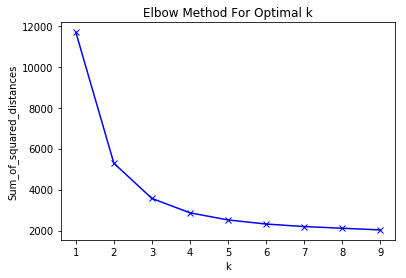

In [6]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict = pd.DataFrame(km.predict(cluster_transformed)) # 학습된 모델이 맞춰 라벨 리턴
km_predict.columns = ['predict']

In [8]:
cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster.index

In [9]:
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed['predict'].value_counts()

0    176883
1     75820
2     18925
Name: predict, dtype: int64

In [11]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

<BarContainer object of 10 artists>

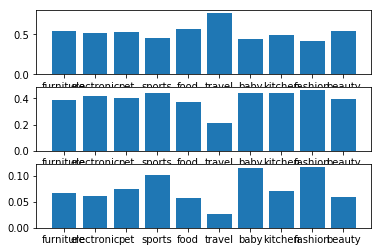

In [12]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()

# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

In [13]:
clutering = pd.concat([sum_of_sum,sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,3,labels
CLAC0_0,40670.0,22052.0,15878.0,2740.0,furniture
CLAC0_1,28007.0,14609.0,11709.0,1689.0,electronic
CLAC0_2,24519.0,12838.0,9836.0,1845.0,pet
CLAC0_3,219670.0,100956.0,96220.0,22494.0,sports
CLAC0_4,62919.0,35859.0,23401.0,3659.0,food
CLAC0_5,3877.0,2952.0,823.0,102.0,travel
CLAC0_6,260839.0,116756.0,114322.0,29761.0,baby
CLAC0_7,79451.0,39067.0,34738.0,5646.0,kitchen
CLAC0_8,614891.0,258843.0,284094.0,71954.0,fashion
CLAC0_9,226919.0,123350.0,90054.0,13515.0,beauty


<BarContainer object of 10 artists>

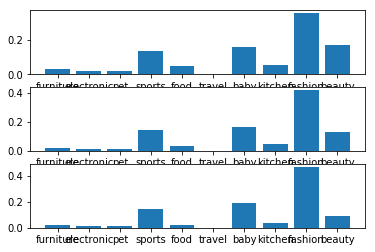

In [14]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [16]:
random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
random_data = cluster_transformed.loc[random_idx, :"month_9"]

score = []
for i in range(10) :
    s = clustering_index(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
8,fashion,378.05,0.0
9,beauty,167.63,1.0
6,baby,167.05,0.0
3,sports,143.52,0.0
7,kitchen,54.67,0.0
4,food,48.06,0.0
0,furniture,29.95,1.0
1,electronic,20.10,0.0
2,pet,17.60,0.0
5,travel,3.68,0.0


## 10대 Cluster (10대 남자가 800명이라 cluster 불가)

In [5]:
cluster = data_cluster.loc[(data_cluster['CLNT_AGE'] == 10)] 
cluster = cluster.drop(['GENDER_F','GENDER_M','CLNT_AGE'], axis=1)
#대대분류 삭제
cluster_drop = cluster.drop(cluster.loc[:, cluster.columns.str.startswith('CLAC0')], axis = 1)
cluster_drop.shape

(3807, 30)

In [6]:
mms = MinMaxScaler()
mms.fit(cluster_drop) #대대분류 뺀 column들만 갖고
cluster_transformed = mms.transform(cluster_drop)

#### Choosing the Number of Clusters : Elbow Method

In [26]:
SSD = []

for k in range(1,10):
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_transformed)
    SSD.append(km.inertia_)

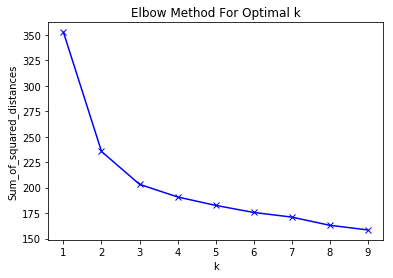

In [27]:
plt.plot(range(1,10), SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
k=3
km = KMeans(n_clusters = k, algorithm = 'auto')
km.fit(cluster_transformed) # 데이터를 이용하여 클러스터링을 위한 학습 시작하고 중심점 추출
km_predict = pd.DataFrame(km.predict(cluster_transformed)) # 학습된 모델이 맞춰 라벨 리턴
km_predict.columns = ['predict']

In [8]:
cluster_transformed = pd.DataFrame(cluster_transformed)
cluster_transformed.columns = cluster_drop.columns
cluster_transformed.index = cluster.index

In [9]:
cluster_transformed['predict'] = km.predict(cluster_transformed)
cluster_transformed['predict'].value_counts()

1    2584
0     987
2     236
Name: predict, dtype: int64

In [10]:
# predict clustering 0
idx = np.where(cluster_transformed['predict'] == 0)
cluster_0 = cluster.loc[cluster.index[idx]]

# predict clustering 1
idx = np.where(cluster_transformed['predict'] == 1)
cluster_1 = cluster.loc[cluster.index[idx]]

# predict clustering 2
idx = np.where(cluster_transformed['predict'] == 2)
cluster_2 = cluster.loc[cluster.index[idx]]

<BarContainer object of 10 artists>

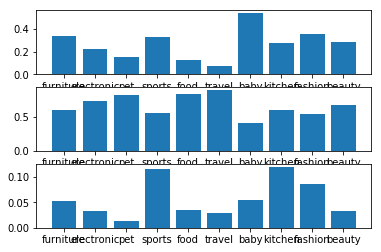

In [13]:
sum_of_sum = cluster[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()

# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum_of_sum)

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum_of_sum)

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum_of_sum)

In [14]:
clutering = pd.concat([sum_of_sum,sum0,sum1,sum2],axis=1)
#clutering = clutering.reindex(['오'])
clutering['labels'] = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']
clutering

,0,1,2,3,labels
CLAC0_0,56.0,19.0,34.0,3.0,furniture
CLAC0_1,298.0,66.0,222.0,10.0,electronic
CLAC0_2,142.0,22.0,118.0,2.0,pet
CLAC0_3,3734.0,1220.0,2084.0,430.0,sports
CLAC0_4,321.0,42.0,268.0,11.0,food
CLAC0_5,167.0,12.0,150.0,5.0,travel
CLAC0_6,258.0,139.0,105.0,14.0,baby
CLAC0_7,208.0,57.0,126.0,25.0,kitchen
CLAC0_8,3578.0,1288.0,1980.0,310.0,fashion
CLAC0_9,3237.0,930.0,2198.0,109.0,beauty


<BarContainer object of 10 artists>

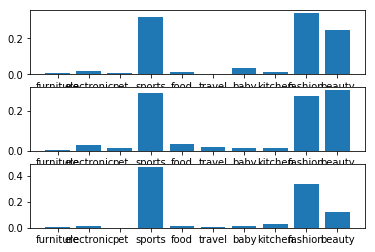

In [15]:
# Cluster 0 
sum0 = cluster_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.bar(labels, sum0/sum0.sum())

# Cluster 1 
sum1 = cluster_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.bar(labels, sum1/sum1.sum())

# Cluster 2
sum2 = cluster_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.bar(labels, sum2/sum2.sum())

### predict by clustering score 

In [18]:
random_idx = cluster_transformed.index[random.randint(0,len(cluster_transformed))]
random_data = cluster_transformed.loc[random_idx, :"month_9"]

score = []
for i in range(10) :
    s = clustering_index(3, random_data, cluster, cluster_transformed, i)*100
    score.append(round(s,2))
actual = list(cluster.loc[random_idx,'CLAC0_0':'CLAC0_9'].values)
pd.DataFrame({'category': labels,'score':score,'actual_buy':actual}).sort_values(['score'],ascending=False)

,category,score,actual_buy
9,beauty,246.63,0.0
3,sports,246.31,0.0
8,fashion,236.37,2.0
4,food,28.16,0.0
1,electronic,24.16,0.0
5,travel,15.44,0.0
7,kitchen,14.44,0.0
6,baby,14.38,0.0
2,pet,12.46,0.0
0,furniture,3.95,0.0
